# Clustering Crypto

In [21]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


### Deliverable 1: Preprocessing the Data for PCA

In [5]:
# Load the crypto_data.csv dataset.
file_path = Path('crypto_data.csv')
crypto_df = pd.read_csv(file_path)
crypto_df.rename(columns={'Unnamed: 0':'Ticker'},inplace=True)
crypto_df.set_index('Ticker',inplace=True)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Keep all the cryptocurrencies that are being traded.
crypto_df=crypto_df[crypto_df['IsTrading']==True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df=crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [8]:
# Remove the "IsTrading" column. 
crypto_df.drop(columns=['IsTrading'],inplace=True)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [13]:
# Remove rows that have at least 1 null value.
crypto_df.dropna(inplace=True)
crypto_df.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [10]:
# Keep the rows where coins are mined.
crypto_df=crypto_df[crypto_df['TotalCoinsMined']!=0]
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [11]:
# Create a new DataFrame that holds only the cryptocurrencies names.
CoinName_df= crypto_df[['CoinName']]
CoinName_df.head()

,CoinName
Ticker,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [12]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df.drop(columns=['CoinName'],inplace=True)
crypto_df.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [14]:
# Use get_dummies() to create variables for text features.
X=pd.get_dummies(crypto_df,columns=['Algorithm','ProofType'])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Ticker,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [16]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
# Get three principal components for the data.
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.33326662,  1.02190194, -0.57723013],
       [-0.31660077,  1.02193495, -0.57762663],
       [ 2.30580522,  1.60604162, -0.69472566],
       ...,
       [ 0.31655206, -2.28513284,  0.40195034],
       [-0.14371077, -2.07376289,  0.37075691],
       [-0.28422576,  0.77923217, -0.25470217]])

In [18]:
# Create a DataFrame with the three principal components.
df_pca = pd.DataFrame(
    data=X_pca, columns=['pc1', 'pc2', 'pc3'], index=CoinName_df.index
)
df_pca.head()

,pc1,pc2,pc3
Ticker,,,
42,-0.333267,1.021902,-0.577230
404,-0.316601,1.021935,-0.577627
1337,2.305805,1.606042,-0.694726
BTC,-0.145757,-1.321541,0.186529
ETH,-0.146751,-2.047730,0.386068


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

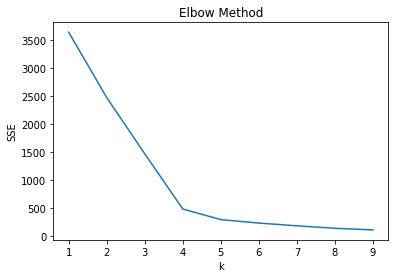

In [22]:
# Create an elbow curve to find the best value for K.
sse={}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Running K-Means with `k=4`

In [23]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=42).fit(X_pca)

# Predict clusters
y_pred = model.predict(X_pca)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [24]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
df_y = pd.DataFrame(y_pred, columns=['Cluster'],index=CoinName_df.index)
clustered_df = crypto_df.join(df_y, how='inner')
clustered_df = clustered_df.join(df_pca, how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.join(CoinName_df, how='inner')

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df.rename(columns={'Cluster':'Class'},inplace=True)

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class,pc1,pc2,pc3,CoinName
Ticker,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,1,-0.333267,1.021902,-0.577230,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,1,-0.316601,1.021935,-0.577627,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,1,2.305805,1.606042,-0.694726,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,0,-0.145757,-1.321541,0.186529,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,0,-0.146751,-2.047730,0.386068,Ethereum
LTC,Scrypt,PoW,6.303924e+07,84000000,0,-0.163127,-1.131880,0.007173,Litecoin
DASH,X11,PoW/PoS,9.031294e+06,22000000,1,-0.402792,1.261040,-0.527785,Dash
XMR,CryptoNight-V7,PoW,1.720114e+07,0,0,-0.152939,-2.198972,0.393988,Monero
ETC,Ethash,PoW,1.133597e+08,210000000,0,-0.145194,-2.047842,0.386048,Ethereum Classic


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [25]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="pc1",
    y="pc2",
    z="pc3",
    color="Class",
    symbol="Class",
    hover_data=['Algorithm','CoinName'],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [26]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 
                                   'Algorithm', 
                                   'ProofType',
                                   'TotalCoinSupply',
                                   'TotalCoinsMined',
                                   'Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [27]:
# Print the total number of tradable cryptocurrencies.
no_unique_CoinName = len(pd.unique(clustered_df['CoinName']))
print("Number of tradable currencies are :", 
      no_unique_CoinName)

Number of tradable currencies are : 531


In [28]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_SM=clustered_df[['TotalCoinSupply','TotalCoinsMined']]
clustered_df_scaled = MinMaxScaler().fit_transform(clustered_SM)
clustered_df_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [31]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
clusterScaled_df=pd.DataFrame(clustered_df_scaled,
                              columns=['TotalCoinSupply','TotalCoinsMined'],
                              index=CoinName_df.index)
# clusterScaled_df.head()
# CoinName_df.head()
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
clusterScaled_df = clusterScaled_df.join(CoinName_df, how='inner')
clusterScaled_df.head()
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
clusterScaled_df = clusterScaled_df.join(df_y, how='inner')
clusterScaled_df.rename(columns={'Cluster':'Class'},inplace=True)
clusterScaled_df.head(20)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
Ticker,,,,
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0


In [30]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
clusterScaled_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class")

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)